In [2]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('shuffled_file.csv')

In [4]:
def classify_application(row):
    """
    Enhanced classification of material applications based on properties.
    Properties:
    - Su: Ultimate Tensile Strength (MPa)
    - Sy: Yield Strength (MPa)
    - E: Young's Modulus (GPa)
    - G: Shear Modulus (GPa)
    - mu: Poisson's Ratio
    - Ro: Density (kg/m³)
    """
    Su, Sy, E, G, mu, Ro = row['Su'], row['Sy'], row['E'], row['G'], row['mu'], row['Ro']
    
    # Original Construction Applications
    if Su > 400 and Sy > 250 and 7600 <= Ro <= 8000 and E > 200 and G > 80:
        if E > 210 and G > 90:
            return "Structural Steel (Beams, Frames in Construction)"
        elif 200 <= E <= 210:
            return "Reinforcement Steel (Rebars in Concrete Construction)"
        elif Ro > 7900 and G > 85:
            return "Steel Alloys (High-Stress Bridges)"
            
    # New Construction Applications
    elif 350 <= Su <= 450 and 200 <= Sy <= 300 and 7400 <= Ro <= 7800:
        return "Light Construction Steel (Roofing and Cladding)"
    elif Su > 300 and Sy > 200 and 2600 <= Ro <= 2800:
        return "Construction Glass and Ceramics"
    
    # Original Machinery Applications
    elif Su > 800 and Sy > 600 and Ro > 7700 and 0.25 <= mu <= 0.35:
        if E > 200 and G > 80:
            return "High-Strength Steel (Gears, Shafts, and Bearings in Machinery)"
        elif E < 200:
            return "Tool Steel (Cutting and Drilling Tools in Machinery)"
        elif Su > 900:
            return "Heat-Resistant Steel (Turbine Components in Machinery)"
            
    # New Machinery Applications
    elif 600 <= Su <= 800 and 400 <= Sy <= 600 and 7500 <= Ro <= 7900:
        return "Medium-Duty Machine Components"
    elif Su > 700 and 300 <= E <= 400 and 8000 <= Ro <= 8500:
        return "Precision Manufacturing Tools"
    
    # Aerospace Applications (New Category)
    elif Su > 900 and Sy > 800 and Ro < 5000 and E > 150:
        return "Aerospace Grade Composites"
    elif 400 <= Su <= 600 and Ro < 3000 and E > 100:
        return "Aircraft Interior Materials"
    elif Su > 1000 and Ro < 4500 and E > 200:
        return "Spacecraft Materials"
    
    # Original Automotive Applications
    elif 400 <= Su <= 600 and 250 <= Sy <= 400 and 7000 <= Ro <= 7800:
        return "Automotive Chassis and Frames"
    elif Su > 600 and Ro < 7700 and G < 70:
        return "Lightweight Alloys (Wheels and Body Panels in Automotive)"
        
    # New Automotive Applications
    elif 300 <= Su <= 500 and Ro < 2000 and E < 100:
        return "Automotive Interior Plastics"
    elif Su > 400 and 6000 <= Ro <= 7000 and 0.3 <= mu <= 0.35:
        return "Automotive Brake Components"
    
    # Original Marine Applications
    elif Su > 450 and Sy > 300 and Ro > 7800 and mu > 0.3:
        return "Corrosion-Resistant Steel (Ship Hulls and Marine Structures)"
    elif Ro < 5000 and G < 40 and mu > 0.35:
        return "Marine Polymers (Coatings and Lightweight Components)"
        
    # New Marine Applications
    elif Su > 350 and Sy > 250 and 7500 <= Ro <= 8000 and mu > 0.28:
        return "Marine Propulsion Components"
    elif 200 <= Su <= 400 and Ro < 3000 and mu > 0.3:
        return "Marine Safety Equipment"
    
    # Original Medical Applications
    elif Su > 800 and Sy > 500 and 7700 <= Ro <= 8100 and 0.2 <= mu <= 0.35:
        return "Medical-Grade Steel (Surgical Instruments and Implants)"
    elif Su < 300 and Ro < 3000 and mu > 0.4:
        return "Medical Polymers (Prosthetics and Medical Devices)"
        
    # New Medical Applications
    elif 400 <= Su <= 600 and 2000 <= Ro <= 4000 and 0.3 <= mu <= 0.4:
        return "Dental Materials"
    elif Su < 200 and Ro < 2000 and mu > 0.35:
        return "Disposable Medical Equipment"
    
    # Semiconductor Industry (New Category)
    elif Su < 300 and Ro > 5000 and E > 150:
        return "Semiconductor Substrate Materials"
    elif Su < 200 and Ro < 3000 and mu < 0.2:
        return "Clean Room Materials"
    
    # Sports Equipment (New Category)
    elif 400 <= Su <= 800 and Ro < 2000 and E > 100:
        return "High-Performance Sports Equipment"
    elif Su < 300 and Ro < 1500 and mu > 0.3:
        return "Protective Sports Gear"
    
    # Original Electronics Applications
    elif E > 100 and G < 40 and Ro < 5000:
        return "Conductive Polymers (Flexible Electronics)"
    elif Su > 200 and Sy > 150 and Ro > 8000:
        return "Copper Alloys (Electrical Wiring and Conductors)"
        
    # New Electronics Applications
    elif Su < 200 and Ro < 2500 and E < 50:
        return "Electronic Packaging Materials"
    elif 150 <= Su <= 300 and 3000 <= Ro <= 5000:
        return "PCB Substrate Materials"
    
    # Original Energy Applications
    elif Su > 600 and Sy > 400 and Ro > 7900 and E > 210:
        return "Energy-Grade Steel (Pipelines for Oil and Gas)"
    elif Su > 500 and Ro < 8000 and E < 150:
        return "Wind Turbine Materials (Blades and Hubs)"
        
    # New Energy Applications
    elif 400 <= Su <= 600 and 6000 <= Ro <= 7500:
        return "Solar Panel Frame Materials"
    elif Su > 300 and Ro < 3000 and E > 50:
        return "Battery Housing Materials"
    
    # Original Defense Applications
    elif Su > 1000 and Sy > 800 and Ro > 7700 and E > 200:
        return "Armor-Grade Steel (Military Vehicles and Protective Barriers)"
    elif Ro < 2500 and Su > 700 and G < 50:
        return "Ballistic Polymers (Lightweight Armor in Defense)"
        
    # New Defense Applications
    elif Su > 800 and 6000 <= Ro <= 7500 and E > 150:
        return "Tactical Equipment Materials"
    elif 500 <= Su <= 700 and Ro < 3000 and G < 60:
        return "Military Communication Equipment Housing"
    
    # Return "Uncategorized" if none of the conditions are met
    return "Uncategorized" 

# Apply the classification function to each row
data['Application'] = data.apply(classify_application, axis=1)

# Save the updated dataset to a new file
data.to_csv('materials_with__applications.csv', index=False)

In [5]:
data1=pd.read_csv('materials_with__applications.csv')

In [7]:
data1.head()

,Material,Su,Sy,E,G,mu,Ro,Use,Application
0,JIS JIS SNCM447,1100,900,206000,80000,0.30,7860,False,"Structural Steel (Beams, Frames in Construction)"
1,ANSI Copper Alloy C19500,552,448,108000,40000,0.35,8930,False,Corrosion-Resistant Steel (Ship Hulls and Mari...
2,ANSI Aluminum Alloy 328.0 Cast (T6),234,145,73000,26000,0.33,2700,False,Marine Safety Equipment
3,ANSI Aluminum Alloy 355.0 Cast (T51),172,124,73000,26000,0.33,2700,False,Uncategorized
4,CSN CSN 422724,637,420,206000,80000,0.30,7160,False,Uncategorized


In [8]:
# Count the number of entries in the Application column with the value "Uncategorized"
uncategorized_count = data1[data1['Application'] == 'Uncategorized'].shape[0]

print(f"Number of 'Uncategorized' entries in the Application column: {uncategorized_count}")


# Count the number of entries in the Application column with the value "Structural Steel (Beams, Frames in Construction)"
structural_steel_count = data1[data1['Application'] == 'Structural Steel (Beams, Frames in Construction)'].shape[0]

print(f"Number of 'Structural Steel (Beams, Frames in Construction)' entries in the Application column: {structural_steel_count}")

Number of 'Uncategorized' entries in the Application column: 305
Number of 'Structural Steel (Beams, Frames in Construction)' entries in the Application column: 728


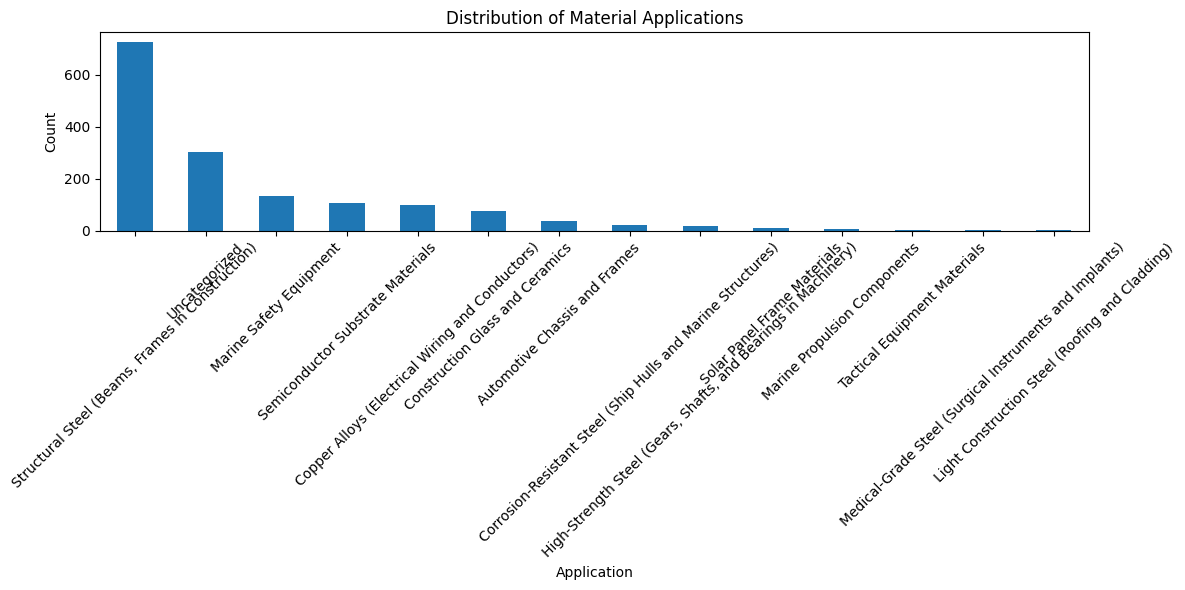

In [6]:
# Check class distribution
plt.figure(figsize=(12, 6))
data['Application'].value_counts().plot(kind='bar')
plt.title('Distribution of Material Applications')
plt.xlabel('Application')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# Separate features (X) and target (y)
X = data1.drop(columns=['Use', 'Material','Application'])  # Drop the target and non-numeric column
y = data1['Application']

In [8]:
# Apply one-hot encoding if necessary (for categorical data11)
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data1[['Material']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Material']))

# Scale numeric features
numeric_features = ['Su', 'Sy', 'E', 'G', 'mu', 'Ro']
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Create engineered features
X['Su_Sy_ratio'] = data['Su'] / data['Sy']
X['E_G_ratio'] = data['E'] / data['G']
X['strength_density_ratio'] = data['Su'] / data['Ro']
X['stiffness_density_ratio'] = data['E'] / data['Ro']

In [9]:
# Combine numeric and encoded features
X = pd.concat([X, encoded_df], axis=1)

In [10]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'Application' column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y = y_encoded

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from collections import Counter
print(Counter(y_train))

Counter({11: 581, 13: 246, 7: 110, 9: 87, 2: 79, 1: 64, 0: 26, 3: 16, 4: 11, 6: 7, 10: 7, 8: 3, 12: 3, 5: 1})


In [38]:
# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Original training set shape:", dict(zip(*np.unique(y_train, return_counts=True))))
print("Balanced training set shape:", dict(zip(*np.unique(y_train_balanced, return_counts=True))))

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 1, n_samples = 1

In [13]:
# Define hyperparameter grids
dt_params = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced']
}

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

svm_params = {
    'C': [1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly'],
    'class_weight': ['balanced']
}


In [14]:
# Train and evaluate Decision Tree
dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_params,
    cv=5,
    scoring='f1_weighted'
)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("\nDecision Tree Results:")
print("Best parameters:", dt.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, dt_pred))

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Decision Tree Results:
Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      1.00      1.00        12
           2       0.95      1.00      0.97        19
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         6
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00        23
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00        21
          10       0.75      1.00      0.86         3
          11       1.00      0.99      1.00       147
          12       1.00      1.00      1.00         1
          13       0.97      1.00      0.98        59

    accuracy                  

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [15]:
# Train and evaluate Random Forest
rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=5,
    scoring='f1_weighted'
)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("\nRandom Forest Results:")
print("Best parameters:", rf.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Random Forest Results:
Best parameters: {'class_weight': 'balanced', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       1.00      1.00      1.00        12
           2       0.90      0.95      0.92        19
           3       0.80      0.80      0.80         5
           4       1.00      1.00      1.00         6
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         1
           7       0.96      1.00      0.98        23
           8       1.00      1.00      1.00         1
           9       1.00      0.95      0.98        21
          10       0.75      1.00      0.86         3
          11       0.97      1.00      0.99       147
          12       0.00      0.00      0.00         1
          13       0.95      0.90      0.92        59

    accur

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [ ]:
# Train and evaluate SVM
svm = GridSearchCV(
    SVC(random_state=42),
    svm_params,
    cv=5,
    scoring='f1_weighted'
)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

print("\nSVM Results:")
print("Best parameters:", svm.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, svm_pred))

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [14]:
# Initialize models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)

In [16]:
# Compile results
results = {
    'Decision Tree': {
        'Accuracy': accuracy_score(y_test, dt_pred), 
        'Precision': precision_score(y_test, dt_pred, average='weighted'),
        'Recall': recall_score(y_test, dt_pred, average='weighted'),
        'F1-Score': f1_score(y_test, dt_pred, average='weighted')
    },
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, rf_pred),
        'Precision': precision_score(y_test, rf_pred, average='weighted'),
        'Recall': recall_score(y_test, rf_pred, average='weighted'),
        'F1-Score': f1_score(y_test, rf_pred, average='weighted')
    },

}

# Display results
results_df = pd.DataFrame(results).T
print("\nFinal Model Performance Comparison:")
print(results_df)


Final Model Performance Comparison:
               Accuracy  Precision    Recall  F1-Score
Decision Tree  0.983923   0.980275  0.983923  0.981307
Random Forest  0.954984   0.946421  0.954984  0.950218


c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

               Accuracy  Precision    Recall  F1-Score
Decision Tree  0.983923   0.980275  0.983923  0.981307
Random Forest  0.954984   0.946421  0.954984  0.950218


<Figure size 1200x600 with 0 Axes>

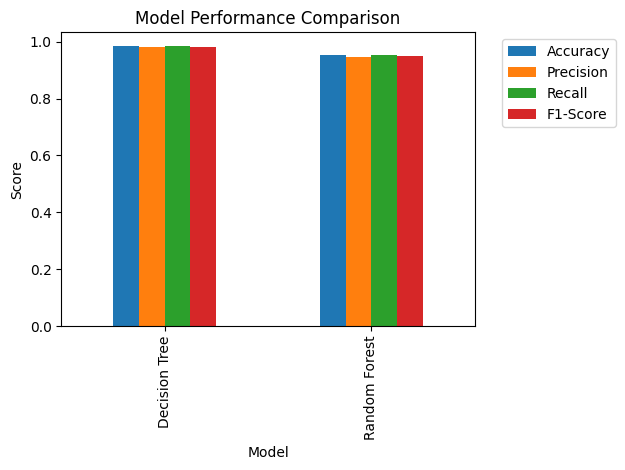

In [18]:
# Visualize results
plt.figure(figsize=(12, 6))
results_df.plot(kind='bar')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

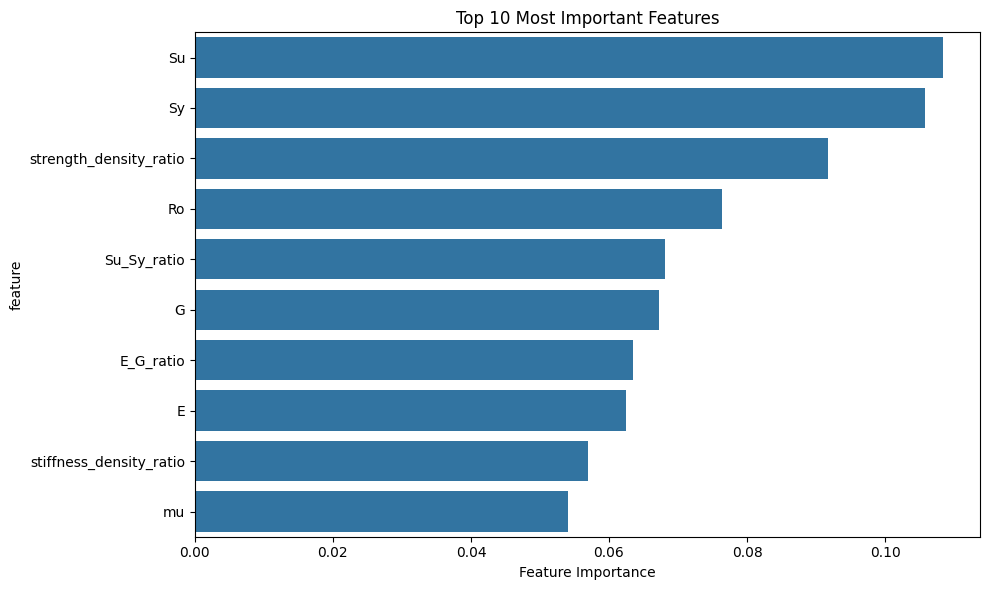

In [19]:
# Feature importance analysis for Random Forest
if hasattr(rf.best_estimator_, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.best_estimator_.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Top 10 Most Important Features')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()